<a href="https://colab.research.google.com/github/Kerwinji/Dive-into-DL-PyTorch/blob/master/An_neural_network_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels = []
train_samples = []

for i in range(0, 50):
    random_younger = randint(13, 65)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    random_younger = randint(13, 65)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [ ]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
train_labels, train_samples = shuffle(train_labels, train_samples)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))   

上面将train_samples reshape成（-1，1）， 下面input_shape为什么是（1，）

In [ ]:
model = Sequential([
                    Dense(units=16, input_shape=(1,), activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
189/189 - 4s - loss: 0.6480 - accuracy: 0.5429 - val_loss: 0.6366 - val_accuracy: 0.6190
Epoch 2/30
189/189 - 0s - loss: 0.6274 - accuracy: 0.6228 - val_loss: 0.6168 - val_accuracy: 0.6762
Epoch 3/30
189/189 - 0s - loss: 0.6051 - accuracy: 0.6772 - val_loss: 0.5925 - val_accuracy: 0.7000
Epoch 4/30
189/189 - 0s - loss: 0.5810 - accuracy: 0.7265 - val_loss: 0.5683 - val_accuracy: 0.7476
Epoch 5/30
189/189 - 0s - loss: 0.5553 - accuracy: 0.7683 - val_loss: 0.5424 - val_accuracy: 0.7857
Epoch 6/30
189/189 - 0s - loss: 0.5277 - accuracy: 0.8011 - val_loss: 0.5151 - val_accuracy: 0.8095
Epoch 7/30
189/189 - 0s - loss: 0.4992 - accuracy: 0.8323 - val_loss: 0.4880 - val_accuracy: 0.8190
Epoch 8/30
189/189 - 0s - loss: 0.4715 - accuracy: 0.8492 - val_loss: 0.4620 - val_accuracy: 0.8429
Epoch 9/30
189/189 - 0s - loss: 0.4449 - accuracy: 0.8683 - val_loss: 0.4383 - val_accuracy: 0.8571
Epoch 10/30
189/189 - 0s - loss: 0.4205 - accuracy: 0.8783 - val_loss: 0.4168 - val_accuracy: 0.8667

In [ ]:
test_samples = []
test_labels = []

for i in range(0, 50):
    random_younger = randint(13, 65)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    random_younger = randint(13, 65)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [ ]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)
predictions

array([[0.30525565, 0.6947443 ],
       [0.66228575, 0.33771423],
       [0.6312322 , 0.36876783],
       ...,
       [0.0537628 , 0.94623727],
       [0.9528862 , 0.04711379],
       [0.02956131, 0.9704387 ]], dtype=float32)

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)  #axis=-1表示索引从最后一个轴选取
rounded_predictions

array([1, 0, 0, ..., 1, 0, 1])

### Plotting A Confusion Matrix

In [ ]:
%matplotlib inline
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)
cm_plot_labels = ['no_side_effects', 'have_side_effexts']
#下面是scikit-learn的website中写的函数
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 933  117]
 [  45 1005]]


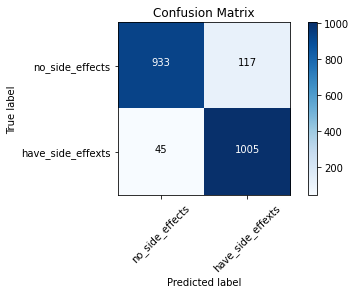

In [ ]:
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

TP=1005, FP=117, TN=933, FN=45
precision = TP / TP+FP = ...
recall = TP / TP+FN = ...